In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

In [ ]:
pd.options.display.max_rows = 20
pd.options.display.max_columns = 50
pd.options.display.precision = 2

In [ ]:
#Loading the dataset
path = "marketing_campaign.csv"
data = pd.read_csv(path, sep="\t")
print("Data Shape", data.shape)


Data Shape (2240, 29)


In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.00,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2.24e+03,2240.0,2240.0,2240.00
mean,5592.16,1968.81,52247.25,0.44,0.51,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,0.07,0.07,0.07,0.06,0.01,9.37e-03,3.0,11.0,0.15
std,3246.66,11.98,25173.08,0.54,0.54,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.26,0.26,0.26,0.25,0.11,9.64e-02,0.0,0.0,0.36
min,0.00,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,3.0,11.0,0.00
25%,2828.25,1959.00,35303.00,0.00,0.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,3.0,11.0,0.00
50%,5458.50,1970.00,51381.50,0.00,0.00,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,3.0,11.0,0.00
75%,8427.75,1977.00,68522.00,1.00,1.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,3.0,11.0,0.00
max,11191.00,1996.00,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,3.0,11.0,1.00


In [ ]:
#Information on features 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#To remove the NA values
data = data.dropna()

In [ ]:
print("Data Shape", data.shape)

Data Shape (2216, 29)


In [ ]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#Dates of the newest and oldest recorded customer
str(data["Dt_Customer"].min()),str(data["Dt_Customer"].max())

('2012-01-08 00:00:00', '2014-12-06 00:00:00')

In [ ]:
#Created a feature "Customer_For"
data["Customer_For"] = data["Dt_Customer"]-data["Dt_Customer"].min()
data["Customer_For"] = data["Customer_For"].dt.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


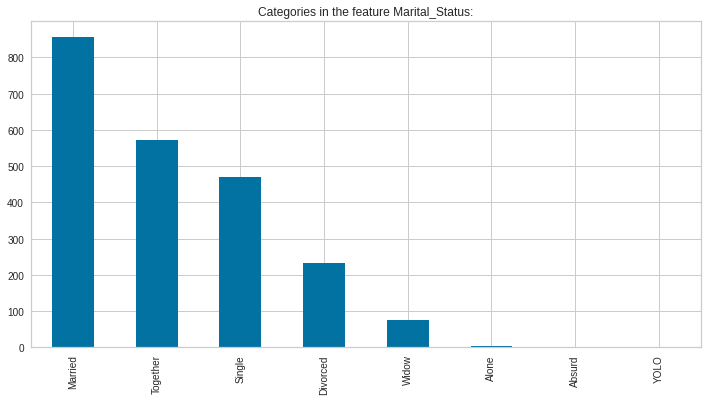

In [ ]:
data["Marital_Status"].value_counts().plot.bar(figsize=(12,6),title = 'Categories in the feature Marital_Status:')

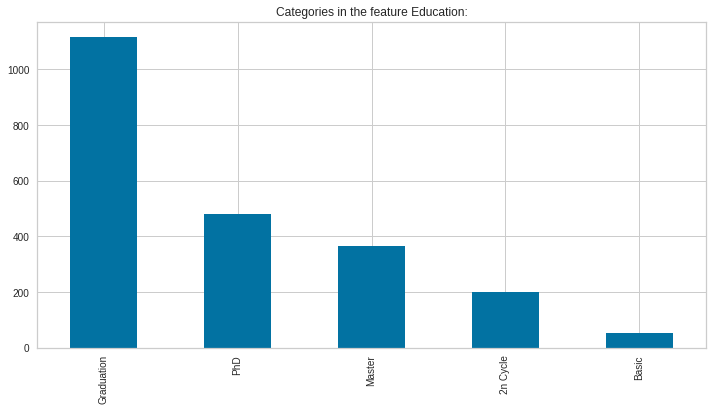

In [ ]:
data["Education"].value_counts().plot.bar(figsize=(12,6),title = 'Categories in the feature Education:')

In [ ]:
#Age of customer today 
data["Age"] = pd.to_datetime('today').year - data["Year_Birth"]

In [ ]:
#Total spendings on various items
prod_cols = ["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]
data["Spent"] = data[prod_cols].sum(axis=1)

In [ ]:
#Deriving living situation by marital status"Alone"
marital_status_dict= {"Married":"Partner", 
                      "Together":"Partner", 
                      "Absurd":"Alone", 
                      "Widow":"Alone", 
                      "YOLO":"Alone", 
                      "Divorced":"Alone", 
                      "Single":"Alone",}

data["Living_With"] = data["Marital_Status"].replace(marital_status_dict)

In [ ]:
#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

In [ ]:
#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

In [ ]:
#Feature pertaining parenthood
data["Is_Parent"] = (data.Children> 0).astype(int)

In [ ]:
#Segmenting education levels in three groups
edu_dict = {"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}
data["Ed_level"]=data["Education"].replace(edu_dict)

In [ ]:
#For clarity we rename columns
col_rename_dict = {"MntWines": "Wines",
                   "MntFruits":"Fruits",
                   "MntMeatProducts":"Meat",
                   "MntFishProducts":"Fish",
                   "MntSweetProducts":"Sweets",
                   "MntGoldProds":"Gold"}
                   
data=data.rename(columns=col_rename_dict)

In [ ]:
#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [ ]:
data.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2.22e+03,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00,2216.00
mean,52247.25,0.44,0.51,49.01,305.09,26.36,167.00,37.64,27.03,43.97,2.32,4.09,2.67,5.80,5.32,0.07,0.07,0.07,0.06,0.01,9.48e-03,0.15,550.99,53.18,607.08,0.95,2.59,0.71
std,25173.08,0.54,0.54,28.95,337.33,39.79,224.28,54.75,41.07,51.82,1.92,2.74,2.93,3.25,2.43,0.26,0.26,0.26,0.24,0.12,9.69e-02,0.36,232.47,11.99,602.90,0.75,0.91,0.45
min,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,26.00,5.00,0.00,1.00,0.00
25%,35303.00,0.00,0.00,24.00,24.00,2.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,377.00,45.00,69.00,0.00,2.00,0.00
50%,51381.50,0.00,0.00,49.00,174.50,8.00,68.00,12.00,8.00,24.50,2.00,4.00,2.00,5.00,6.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,550.00,52.00,396.50,1.00,3.00,1.00
75%,68522.00,1.00,1.00,74.00,505.00,33.00,232.25,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,723.00,63.00,1048.00,1.00,3.00,1.00
max,666666.00,2.00,2.00,99.00,1493.00,199.00,1725.00,259.00,262.00,321.00,15.00,27.00,28.00,13.00,20.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,1063.00,129.00,2525.00,3.00,5.00,1.00


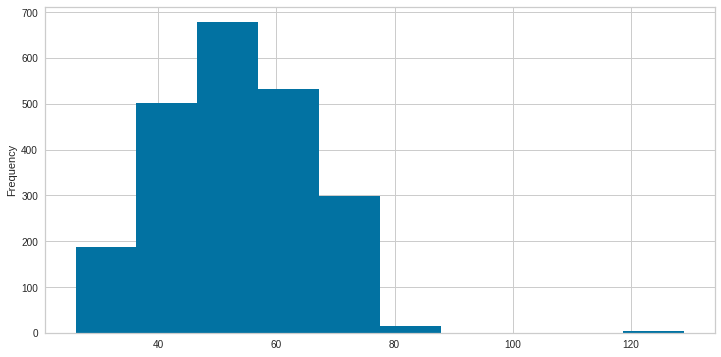

In [ ]:
data["Age"].plot.hist(figsize=(12,6))

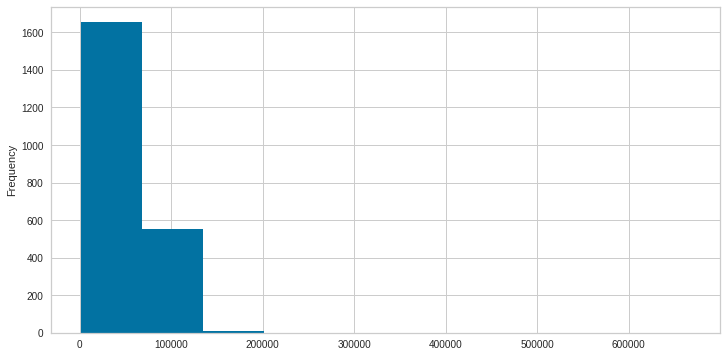

In [ ]:
data["Income"].plot.hist(figsize=(12,6))

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
prev_len = len(data)
data = data[(data["Age"]<99)]
data = data[(data["Income"]<150000)]
new_len = prev_len - len(data)
print('Removed outliers:',new_len)

Removed outliers: 11


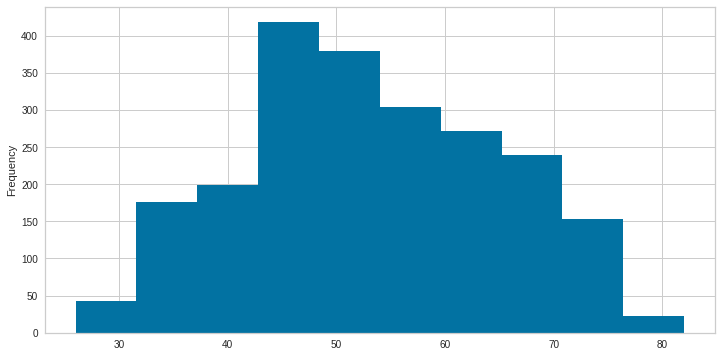

In [ ]:
data["Age"].plot.hist(figsize=(12,6))

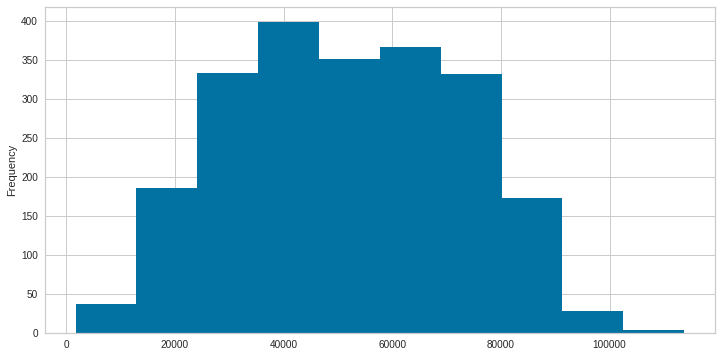

In [ ]:
data["Income"].plot.hist(figsize=(12,6))

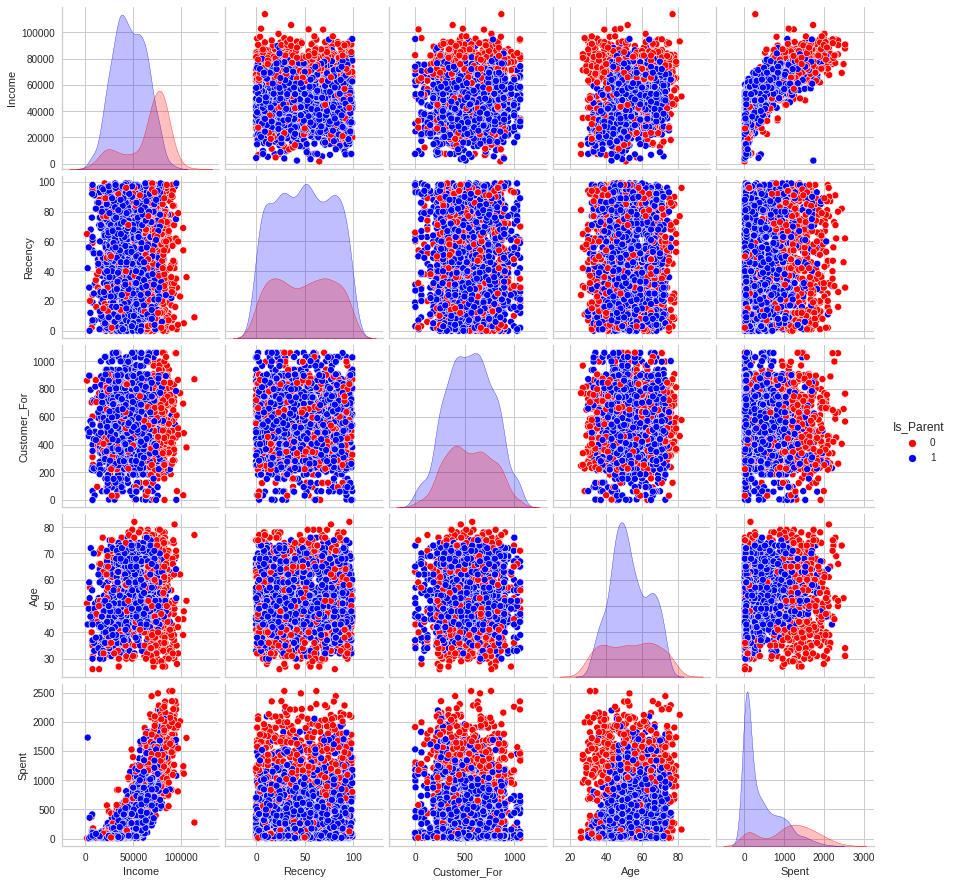

In [ ]:
sns.pairplot(data[["Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]], hue= "Is_Parent",palette= (["red","blue"]))

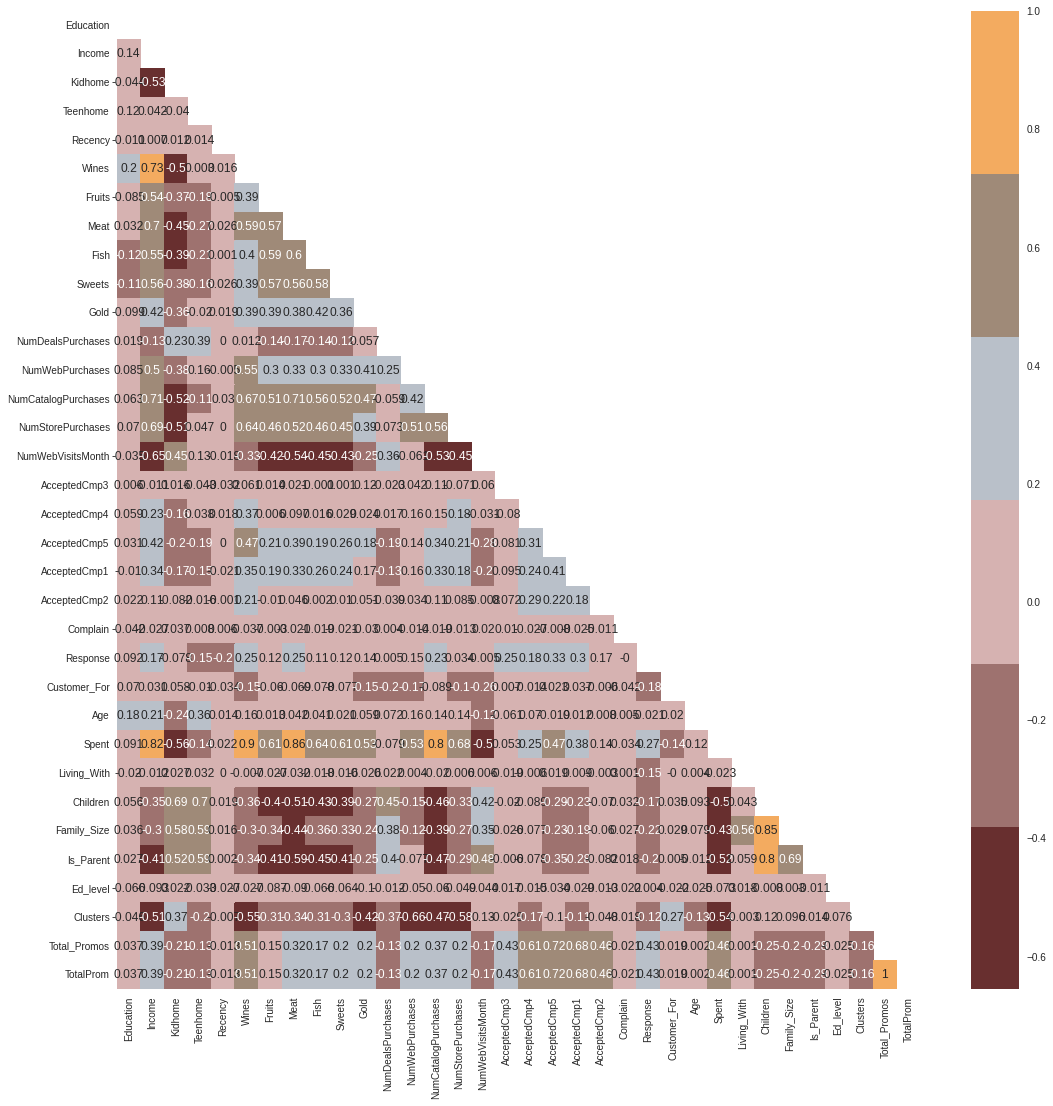

In [ ]:
import numpy as np

df_corr = data.corr()
mask = np.triu(np.ones_like(df_corr, dtype=bool))
df_corr = df_corr.mask(mask).round(3)
fig, ax = plt.subplots(figsize=(18,18))

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
sns.heatmap(df_corr, cmap=cmap,annot=True,ax=ax)    

In [ ]:
#Get list of categorical variables
object_cols = [c for c in data.columns if data[c].dtypes == 'object']

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With', 'Ed_level']


In [ ]:
#Label Encoding the object dtypes.
LE = LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)

In [ ]:
#Creating a copy of data
scaled_ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
scaled_ds = scaled_ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(scaled_ds)
scaled_ds = pd.DataFrame(scaler.transform(scaled_ds),columns= scaled_ds.columns )

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Ed_level
0,-0.35,0.31,-0.82,-0.93,0.31,0.97,1.55,1.75,2.45,1.48e+00,0.85,0.36,1.42,2.63,-0.56,0.69,-1.97,1.02,1.68,-1.35,-1.27,-1.76,-1.58,-0.89
1,-0.35,-0.25,1.04,0.91,-0.38,-0.87,-0.64,-0.73,-0.65,-6.35e-01,-0.74,-0.17,-1.13,-0.59,-1.18,-0.14,1.66,1.27,-0.96,-1.35,1.40,0.45,0.63,-0.89
2,-0.35,0.97,-0.82,-0.93,-0.80,0.36,0.57,-0.18,1.34,-1.49e-01,-0.04,-0.70,1.42,-0.23,1.29,-0.55,0.17,0.33,0.28,0.74,-1.27,-0.66,-1.58,-0.89
3,-0.35,-1.21,1.04,-0.93,-0.80,-0.87,-0.56,-0.67,-0.51,-5.87e-01,-0.76,-0.17,-0.77,-0.95,-0.56,0.27,1.92,-1.29,-0.92,0.74,0.07,0.45,0.63,-0.89
4,1.43,0.32,1.04,-0.93,1.56,-0.39,0.42,-0.22,0.15,-3.12e-03,-0.56,1.42,0.33,0.13,0.05,-0.14,0.82,-1.03,-0.31,0.74,0.07,0.45,0.63,0.57


In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
PCA_ds = pca.fit_transform(scaled_ds)
PCA_ds = pd.DataFrame(PCA_ds, columns=(["component_one","component_two", "component_three"]))
# PCA_ds.describe().T

In [ ]:
print(pca.explained_variance_ratio_)

[0.35092717 0.12336458 0.06470715]


In [ ]:
print('Total explained variance',sum(pca.explained_variance_ratio_))

Total explained variance 0.5389989029179605


In [ ]:
PCA_ds.head()

,component_one,component_two,component_three
0,5.04,-0.25,2.42
1,-2.89,0.01,-1.92
2,2.62,-0.75,-0.21
3,-2.71,-1.57,-0.43
4,-0.63,0.38,0.04


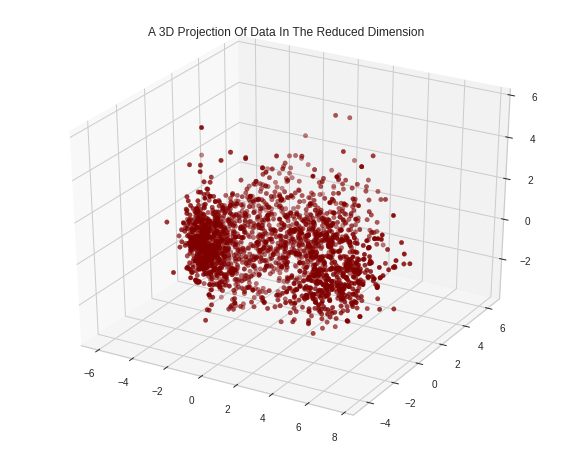

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["component_one"]
y =PCA_ds["component_two"]
z =PCA_ds["component_three"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

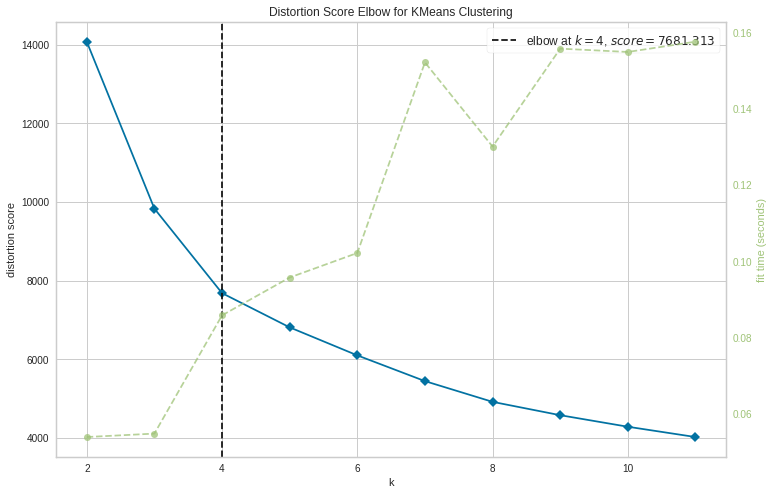

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
fig = plt.figure(figsize=(12,8))
elbow = KElbowVisualizer(KMeans(), k=(2,12), metric='distortion') # distortion: mean sum of squared distances to centers
elbow.fit(PCA_ds)
elbow.show()

In [ ]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

In [ ]:
data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Ed_level,Clusters
0,2,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,92,65,1617,0,0,1,0,0,1
1,2,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,938,68,27,0,2,3,1,0,3
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,591,57,776,1,0,2,0,0,1
3,2,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,998,38,53,1,1,3,1,0,2
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,742,41,422,1,1,3,1,1,0


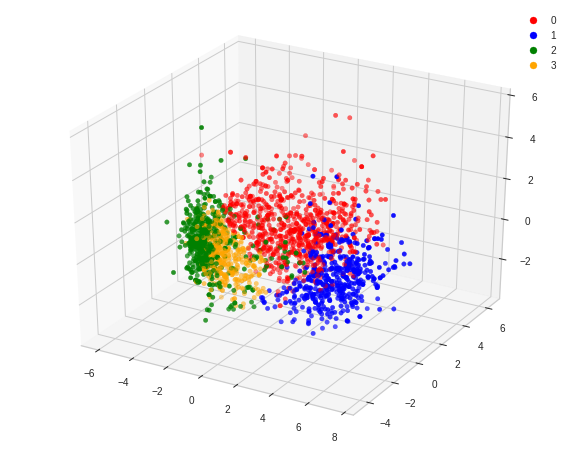

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# x = [1, 3, 4, 6, 7, 9]
# y = [0, 0, 5, 8, 8, 8]
classes = [0,1,2,3]
values = PCA_ds["Clusters"]
colors = ListedColormap(['red','blue','green','orange'])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(projection='3d')
scatter = ax.scatter(x, y,z, c=values, cmap=colors)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)

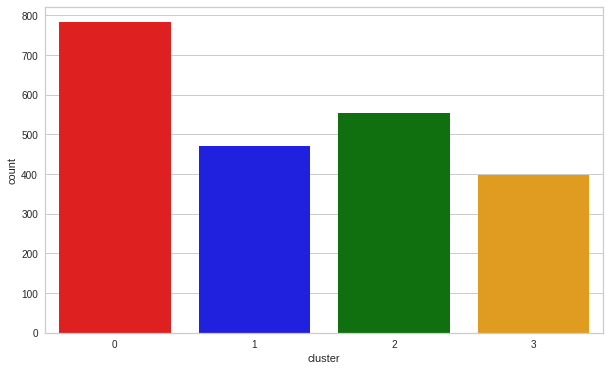

In [ ]:
cluster_count = PCA_ds["Clusters"].value_counts().reset_index()
cluster_count.columns  = ['cluster','count']
f, ax = plt.subplots(figsize=(10, 6))
fig = sns.barplot(x="cluster", y="count", palette=['red','blue','green','orange'],data=cluster_count)

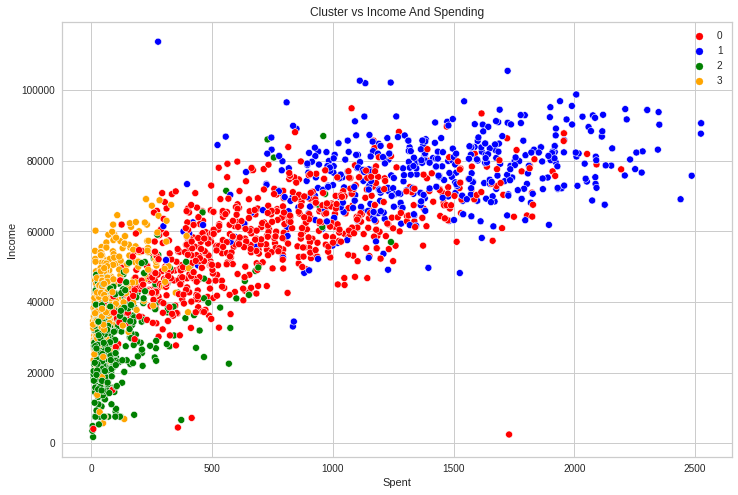

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= colors)
pl.set_title("Cluster vs Income And Spending")
plt.legend()
plt.show()

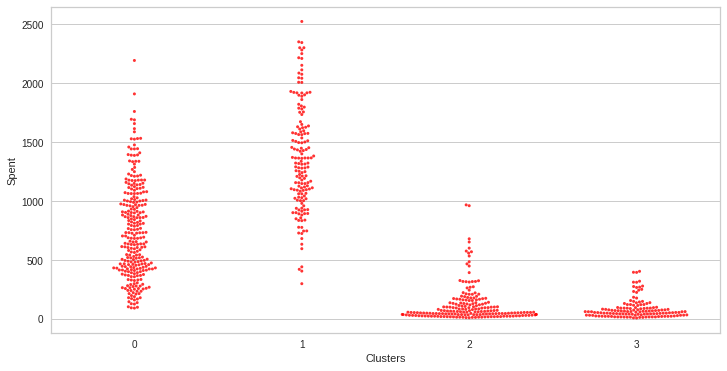

In [ ]:
f, ax = plt.subplots(figsize=(12,6))
sample = data.sample(750)
pl = sns.swarmplot(x=sample["Clusters"], y=sample["Spent"], color= "red", alpha=0.8 ,size=3)

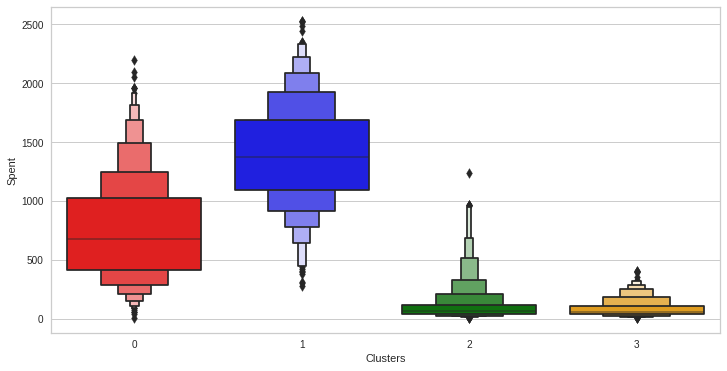

In [ ]:
f, ax = plt.subplots(figsize=(12, 6))
pl = sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=['red','blue','green','orange'])

Text(0, 0.5, 'Count')

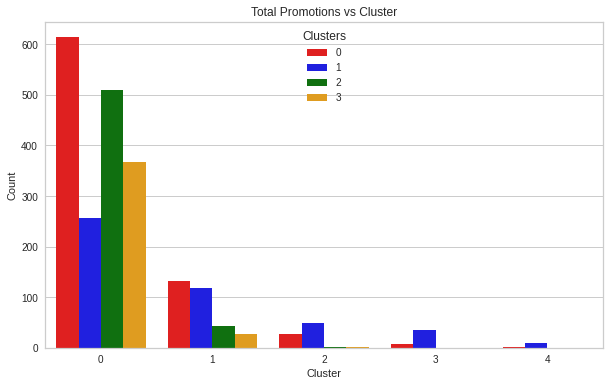

In [ ]:
#Creating a feature to get a sum of accepted promotions 
data["TotalProm"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
f, ax = plt.subplots(figsize=(10, 6))
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= ['red','blue','green','orange'])
pl.set_title("Total Promotions vs Cluster")
pl.set_xlabel("Cluster")
pl.set_ylabel("Count")
# plt.show()

Text(0.5, 1.0, 'Purchased Deals')

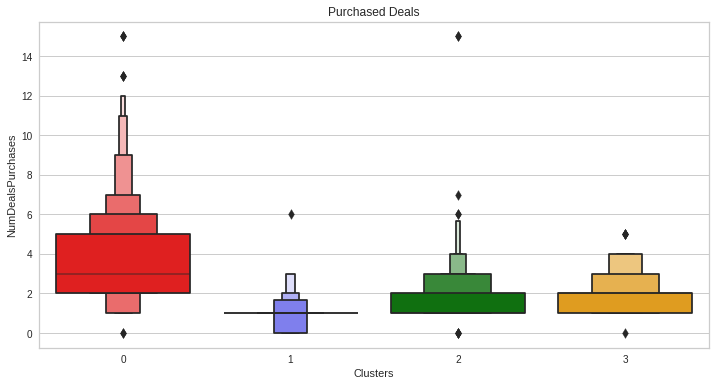

In [ ]:
#Plotting the number of deals purchased
f, ax = plt.subplots(figsize=(12, 6))
pl = sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= ['red','blue','green','orange'])
pl.set_title("Purchased Deals")

In [ ]:
data['Education'].value_counts()

2    1113
4     476
3     364
0     198
1      54
Name: Education, dtype: int64

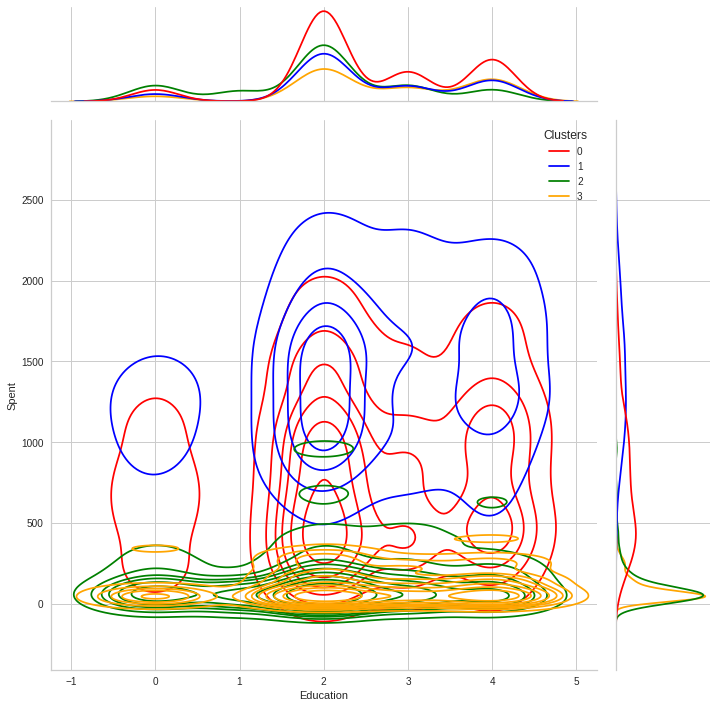

In [ ]:
sns.jointplot(x=data['Education'], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=['red','blue','green','orange'],height=10)

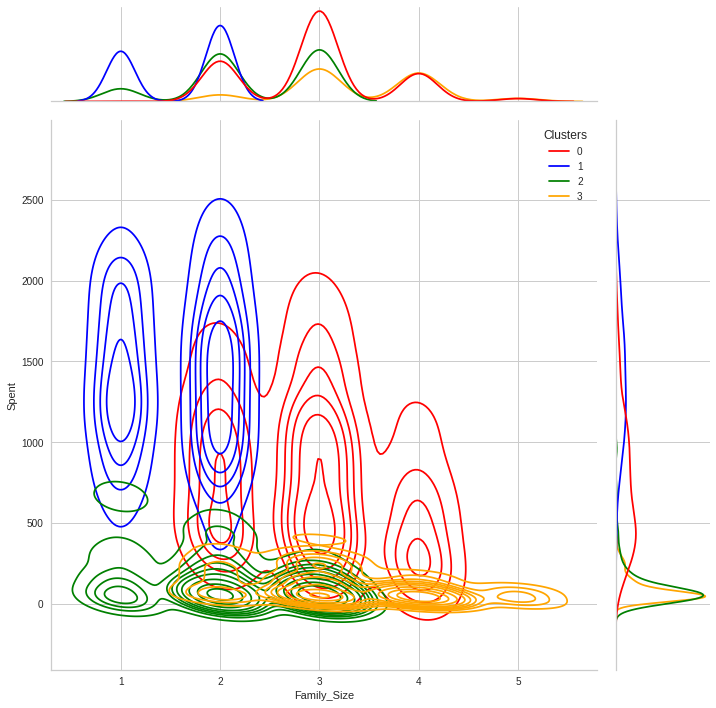

In [ ]:
sns.jointplot(x=data['Family_Size'], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=['red','blue','green','orange'],height=10)

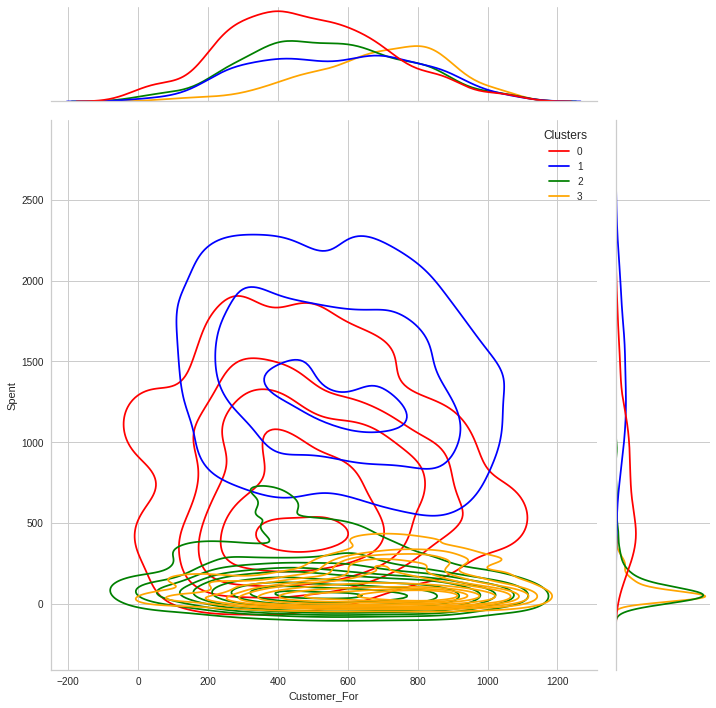

In [ ]:
sns.jointplot(x=data['Customer_For'], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=['red','blue','green','orange'],height=10)

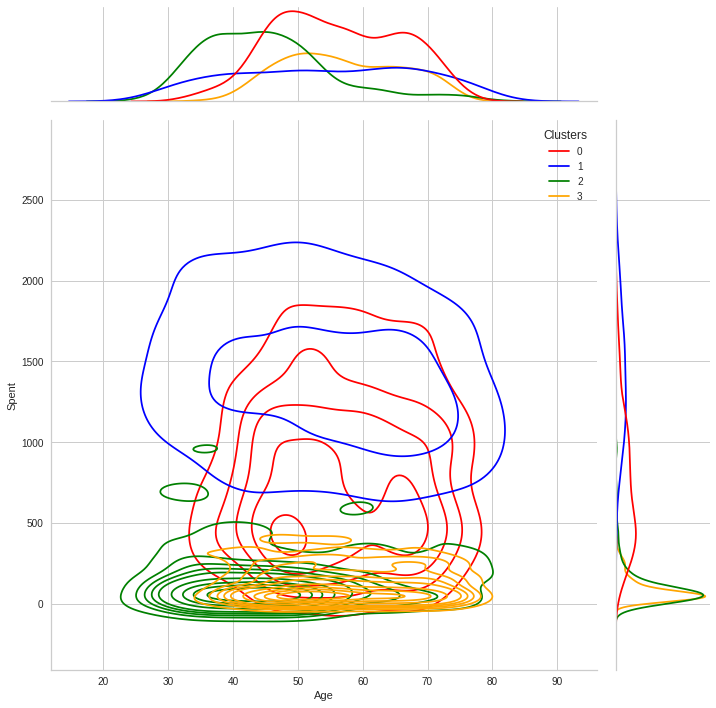

In [ ]:
sns.jointplot(x=data['Age'], y=data["Spent"], hue =data["Clusters"], kind="kde", palette=['red','blue','green','orange'],height=10)